## Implementation of Manual Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
)

In [2]:
# scikit-learn dataset which we'll use
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
    
# classification problem, where we are trying to predict whether the tumor is malignant(1) or benign(0)

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# percentage of benign (0) and malign tumors (1)

y.value_counts() / len(y)

0    0.627417
1    0.372583
dtype: float64

In [4]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape #numpy shape to get the current shape of the array

((455, 30), (114, 30))

##Logistic Regression: 

In [10]:
# Logistic Regression, setting up a logistic regression with some parameters 
logit = LogisticRegression(penalty ='l2', C=0.01, solver='liblinear', random_state=0, max_iter=10000)

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=kf, # k-fold CV
)

# take C 0.01 vs 1, taking C = 1 increases the accuracy of the model
# take regularization l1 vs l2, taking lesser value of regularization parameter, as expected decreases the accuracy of the model

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9346153846153846  +-  0.00439560439560438
mean test set accuracy:  0.9296703296703297  +-  0.016446845656149216


In [12]:
# let's try to predict now
logit.fit(X_train, y_train)

train_preds = logit.predict(X_train)
test_preds = logit.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9318681318681319
Test Accuracy:  0.9385964912280702


##Random Forest Classifier:

In [21]:
rf = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=0, n_jobs=4)

# estimate generalization error
clf =  cross_validate(rf,
                      X_train,
                      y_train, 
                      scoring='accuracy',
                      return_train_score=True,
                      cv=kf, # k-fold CV
)

#take values of n_estimators to be 500 and less
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))

print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  1.0  +-  0.0
mean test set accuracy:  0.956043956043956  +-  0.013900121583157714


In [22]:
# let's get the predictions
rf.fit(X_train, y_train)

train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  1.0
Test Accuracy:  0.9736842105263158


## Implementation of Grid Search:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score # finds area under the ROC curve

from sklearn.model_selection import (GridSearchCV,train_test_split)

In [26]:
# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
    
# classification problem, where we are trying to predict whether the tumor is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# percentage of benign (0) and malign tumors (1)

y.value_counts() / len(y)

0    0.627417
1    0.372583
dtype: float64

In [28]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [30]:
# using the gbm model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=[10, 20, 50, 100],
    min_samples_split=[0.1, 0.3, 0.5],
    max_depth=[1,2,3,4,None],
    )

print('Number of hyperparam combinations in the hyperparam space: ',  len(param_grid['n_estimators']) *len(param_grid['min_samples_split']) *len(param_grid['max_depth']))

Number of hyperparam combinations in the hyperparam space:  60


In [31]:
# using grid search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [32]:
search.best_params_

{'max_depth': 4, 'min_samples_split': 0.3, 'n_estimators': 100}

In [34]:
results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

(60, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018122,0.000954,0.002645,0.000118,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.953239,0.977011,0.949843,0.972309,0.963950,0.963271,0.010506,58
1,0.029694,0.000535,0.002625,0.000226,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.963950,0.974138,0.955068,0.983804,0.983020,0.971996,0.011107,53
2,0.071468,0.002462,0.002595,0.000142,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.984848,0.989289,0.965778,0.993730,0.988506,0.984431,0.009745,31
3,0.144870,0.006052,0.002583,0.000064,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.992685,0.992163,0.963950,0.997388,0.996343,0.988506,0.012443,19
4,0.016654,0.001017,0.002778,0.000501,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.953239,0.977011,0.949843,0.972309,0.963950,0.963271,0.010506,58


In [35]:

results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head() # return the first 5 rows 

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,4,0.3,100,0.992581,0.007717
1,3,0.3,100,0.991954,0.007824
2,3,0.5,100,0.991745,0.009354
3,4,0.5,100,0.991745,0.008459
4,2,0.3,100,0.991641,0.009662


In [ ]:
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail() # return the last 5 rows

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
55,None,0.3,10,0.971839,0.009186
56,2,0.5,10,0.971630,0.009454
57,1,0.3,10,0.963271,0.010506
58,1,0.5,10,0.963271,0.010506
59,1,0.1,10,0.963271,0.010506


Text(0.5, 0, 'Hyperparameter combinations')

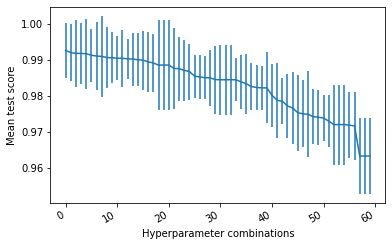

In [ ]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [ ]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))


Train roc_auc:  1.0
Test roc_auc:  0.9971419498253413


If we take each hyperparameter individually, and try to evaluate the model's performance:

In [ ]:
def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp
    

In [ ]:
# performance change for n_estimators

tmp = summarize_by_param('param_n_estimators')

tmp.head()


,mean_test_score,std_test_score
param_n_estimators,,
10,0.972487,0.005213
20,0.980718,0.004976
50,0.987945,0.002752
100,0.990014,0.001989


Text(0, 0.5, 'roc-auc')

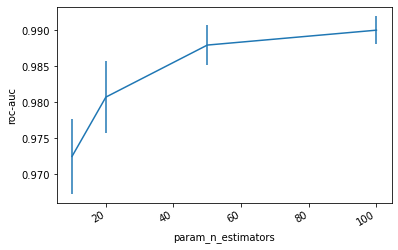

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal hyperparameter seems to be somewhere between 60 and 100.

In [ ]:
# performance change for max_depth
tmp = summarize_by_param('param_max_depth')
tmp.head()

,mean_test_score,std_test_score
param_max_depth,,
1,0.977051,0.010459
2,0.984914,0.007422
3,0.984740,0.007335
4,0.984953,0.006243


Text(0, 0.5, 'roc-auc')

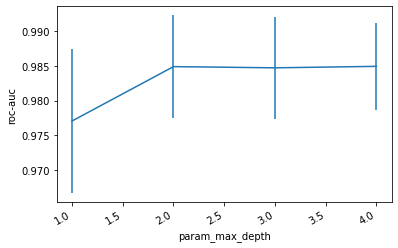

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal hyperparameter seems to be between 2 and 3.

In [ ]:
# performance change with the number of samples split
tmp = summarize_by_param('param_min_samples_split')
tmp.head()

,mean_test_score,std_test_score
param_min_samples_split,,
0.1,0.982197,0.007868
0.3,0.982652,0.008327
0.5,0.983524,0.007996


Text(0, 0.5, 'roc-auc')

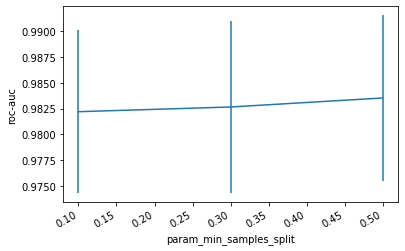

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

This hyperparameter doesn't really seem to affect the performance of the model. 

## Implementation of Random Search:

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (RandomizedSearchCV, train_test_split)

In [37]:
# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
    
# classification problem, where we are trying to predict whether the tumor is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
# percentage of benign (0) and malign tumors (1)

y.value_counts() / len(y)

0    0.627417
1    0.372583
dtype: float64

In [39]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [40]:
stats.randint.rvs(1, 5)

4

In [41]:
stats.uniform.rvs(0, 1)


0.39743899186741094

In [42]:
# using the gbm model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    loss=('deviance', 'exponential'),
    )

In [43]:
# using random search
search = RandomizedSearchCV(gbm, param_grid, scoring='roc_auc',cv=5,n_iter = 60,random_state=10,n_jobs=4, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [44]:
search.best_params_

{'loss': 'deviance',
 'max_depth': 3,
 'min_samples_split': 0.21221285164407444,
 'n_estimators': 110}

In [ ]:
results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

(60, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.533939,0.007582,0.006741,0.002784,exponential,2,0.0207519,74,"{'loss': 'exponential', 'max_depth': 2, 'min_s...",0.997388,0.991641,0.973877,0.996343,0.998433,0.991536,0.009130,9
1,0.559025,0.049271,0.006154,0.002693,exponential,4,0.831911,103,"{'loss': 'exponential', 'max_depth': 4, 'min_s...",0.997388,0.992163,0.961338,0.998433,0.997388,0.989342,0.014173,25
2,0.126247,0.020788,0.004638,0.002809,deviance,2,0.198063,18,"{'loss': 'deviance', 'max_depth': 2, 'min_samp...",0.983281,0.980146,0.961338,0.986938,0.987722,0.979885,0.009662,53
3,0.212642,0.010216,0.006129,0.005611,exponential,1,0.263603,46,"{'loss': 'exponential', 'max_depth': 1, 'min_s...",0.987983,0.989028,0.961860,0.991641,0.989551,0.984013,0.011140,50
4,0.094107,0.004917,0.005998,0.003410,exponential,1,0.816602,21,"{'loss': 'exponential', 'max_depth': 1, 'min_s...",0.975967,0.974138,0.957680,0.983281,0.979101,0.974033,0.008745,55


In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,3,0.212213,110,0.992163,0.006576
1,3,0.140576,117,0.991850,0.006547
2,4,0.563191,88,0.991850,0.009220
3,3,0.171239,117,0.991745,0.006470
4,2,0.0291796,51,0.991745,0.007436


In [ ]:
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
55,4,0.781949,18,0.972936,0.008506
56,2,0.821106,21,0.972623,0.010884
57,1,0.653623,14,0.967659,0.012145
58,1,0.10462,10,0.963271,0.010506
59,2,0.820704,10,0.961076,0.008173


Text(0.5, 0, 'Hyperparameter combinations')

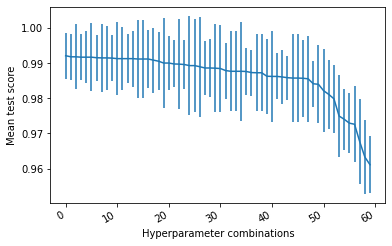

In [ ]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [ ]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.9961892664337885


In [ ]:
def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

In [ ]:
# performance change for n_estimators

tmp = summarize_by_param('param_n_estimators')

tmp.head()

,mean_test_score,std_test_score
param_n_estimators,,
10,0.962173,0.001552
14,0.967659,NaN
16,0.984169,NaN
17,0.981139,NaN
18,0.976411,0.004914


Text(0, 0.5, 'roc-auc')

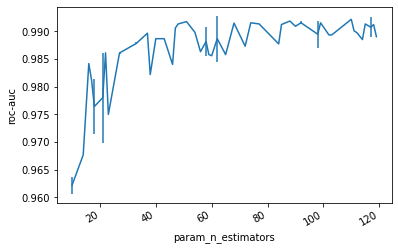

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

In [ ]:
tmp = summarize_by_param('param_max_depth')
tmp.head()

,mean_test_score,std_test_score
param_max_depth,,
1,0.983410,0.007647
2,0.987113,0.007556
3,0.988689,0.004919
4,0.987006,0.005915


Text(0, 0.5, 'roc-auc')

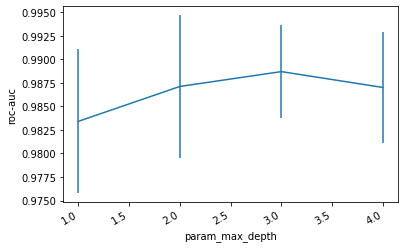

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal value is between 2.0 and 3.0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8a1870dd0>],
      dtype=object)

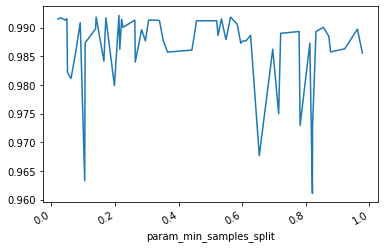

In [ ]:
tmp = summarize_by_param('param_min_samples_split')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)

(0.975, 1.0)

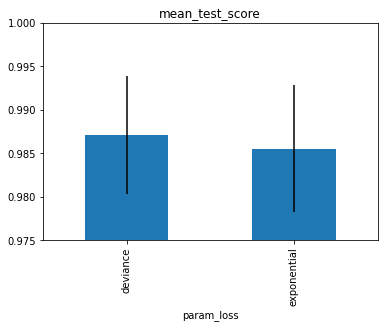

In [ ]:
tmp = summarize_by_param('param_loss')
tmp['mean_test_score'].plot.bar(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylim(0.975,1)